In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install shap

## **ML PROJECT**

#### **IMPORT LIBRARIES**

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import io
import base64
import shap

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import KFold

#### **IMPORT RAW DATA**

In [30]:
file_path = r"C:\Users\91709\Desktop\internship\ML_Project Excel Data.xlsx"

if file_path.endswith(".csv"):
    data = pd.read_csv(file_path)
elif file_path.endswith((".xls", ".xlsx")):
    data = pd.read_excel(file_path)
else:
    raise ValueError("Only .csv or .xls/.xlsx files are supported.") 


#### **Sample Data**

In [31]:
data

,e-void ratio,Confining pressure,Strain rate,cycles,shear modulus
0,1.4,100,0.01,1,4.89
1,1.4,100,0.01,2,7.66
2,1.4,100,0.01,3,5.72
3,1.4,100,0.01,4,8.01
4,1.4,100,0.01,5,7.11
...,...,...,...,...,...
2195,1.6,400,5.00,36,0.67
2196,1.6,400,5.00,37,0.69
2197,1.6,400,5.00,38,0.69
2198,1.6,400,5.00,39,0.68


In [32]:
print("First 5 rows of Dataset:\n", data.head())

First 5 rows of Dataset:
    e-void ratio  Confining pressure  Strain rate   cycles  shear modulus 
0           1.4                 100          0.01       1            4.89
1           1.4                 100          0.01       2            7.66
2           1.4                 100          0.01       3            5.72
3           1.4                 100          0.01       4            8.01
4           1.4                 100          0.01       5            7.11


#### **Data Info**

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   e-void ratio        2200 non-null   float64
 1   Confining pressure  2200 non-null   int64  
 2   Strain rate         2200 non-null   float64
 3   cycles              2200 non-null   int64  
 4   shear modulus       2200 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 86.1 KB


In [34]:
data.describe()

,e-void ratio,Confining pressure,Strain rate,cycles,shear modulus
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1.436364,263.636364,1.722000,20.500000,4.650183
std,0.106818,118.906089,1.867705,11.546021,3.700036
min,1.300000,100.000000,0.010000,1.000000,0.170000
25%,1.300000,100.000000,0.100000,10.750000,1.490000
50%,1.400000,250.000000,1.000000,20.500000,3.690000
75%,1.500000,400.000000,2.500000,30.250000,7.202500
max,1.600000,400.000000,5.000000,40.000000,17.300000


#### **Pair Plot**

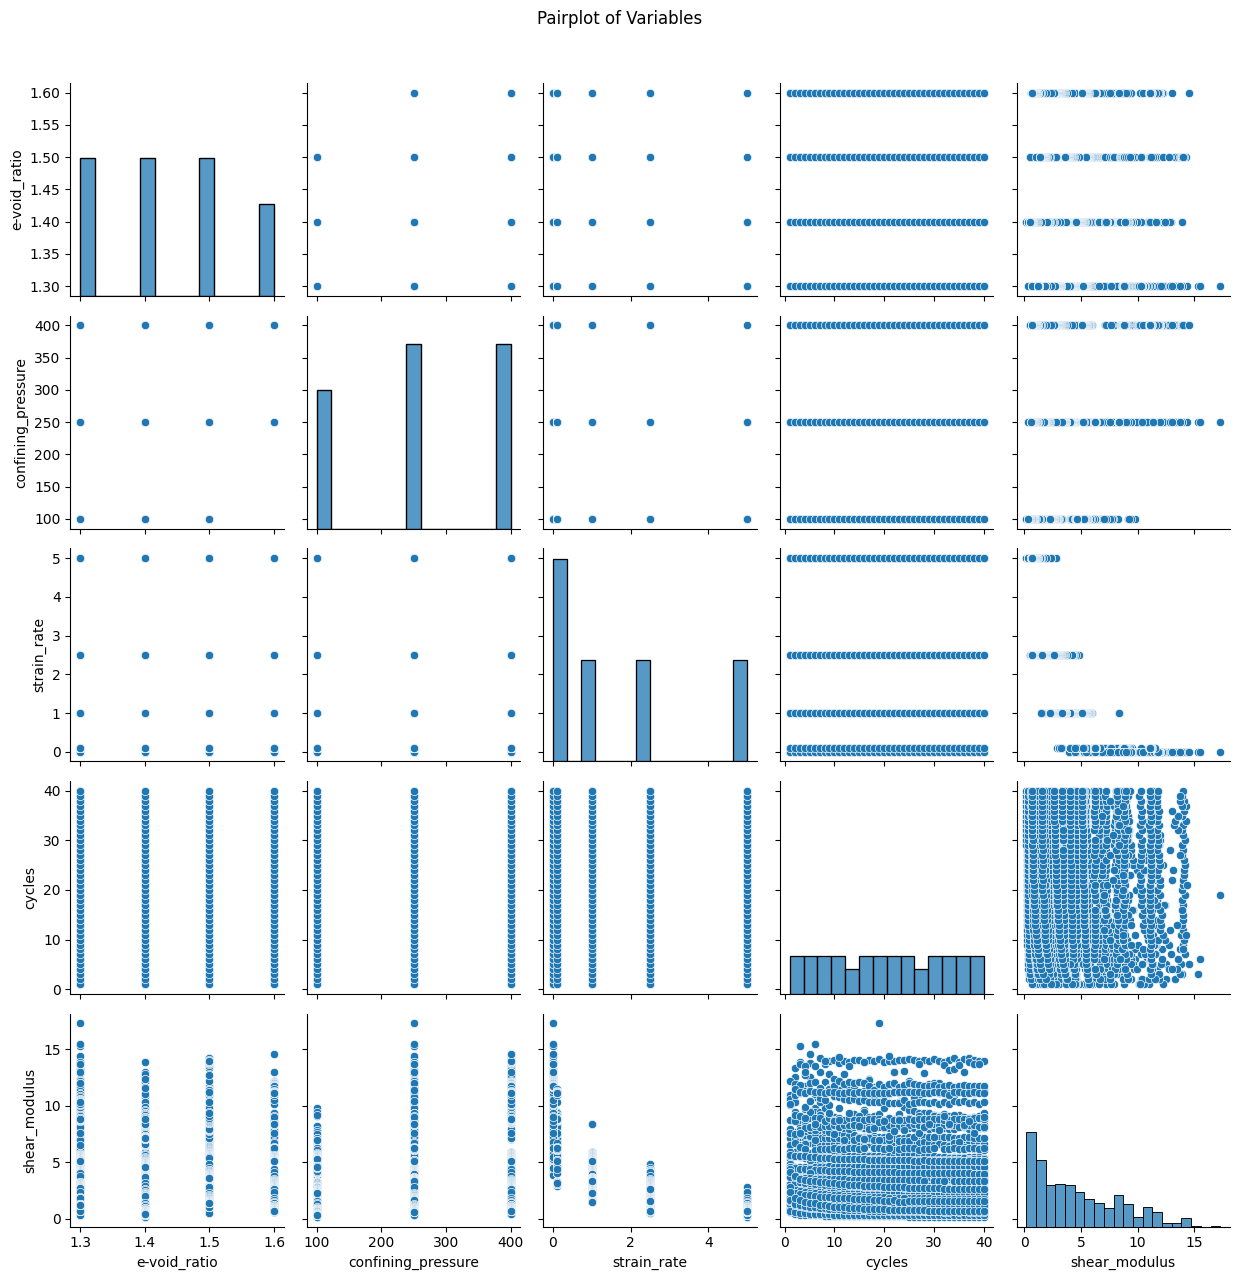

In [35]:

data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

# Pairplot
sns.pairplot(data)
plt.suptitle("Pairplot of Variables", y=1.02)
plt.tight_layout()
plt.show()



#### **Correlation Matrix**

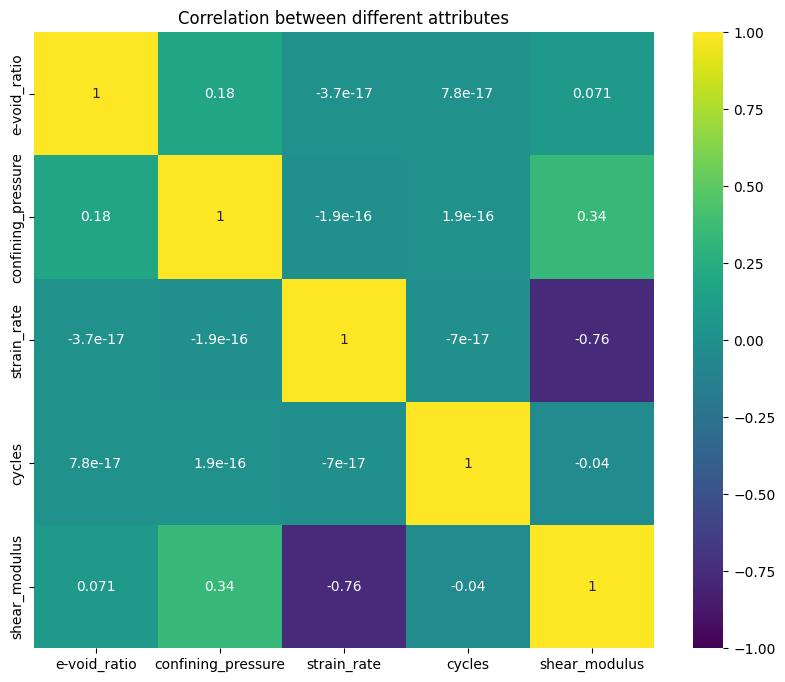

In [36]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation between different attributes")
plt.show()

#### **Box Plot**

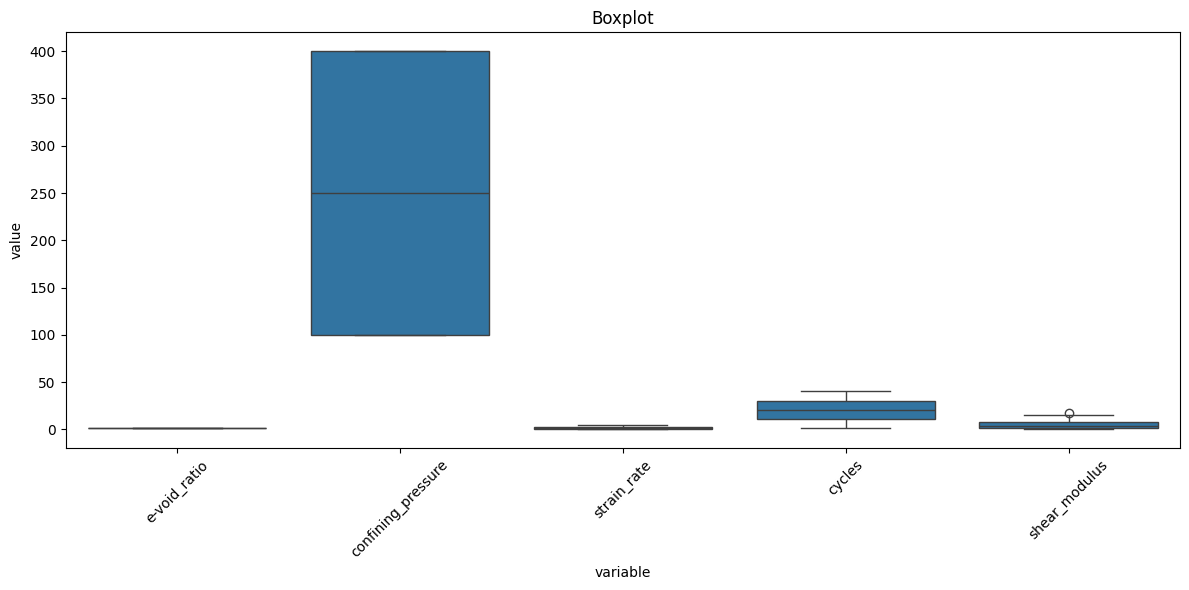

In [37]:
# Boxplot

data_melted = data.melt()

plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=data_melted)
plt.title("Boxplot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Random Forest Model**


----RandomForest Model-----

 Evaluation Metrics Before Hyperparameter Tuning
R² Score: 0.9687
RMSE: 0.6470
MAE: 0.1842
MSE: 0.4186
Fitting 5 folds for each of 72 candidates, totalling 360 fits

 Best Hyperparameters Found:
 {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}

 Evaluation Metrics After Hyperparameter Tuning
R² Score: 0.9711
RMSE: 0.6218
MAE: 0.1837
MSE: 0.3866

 Cross-validation R² Scores: [0.96961175 0.97847657 0.98529844 0.98764418 0.98253558]
Mean CV R² Score: 0.9807133036981803


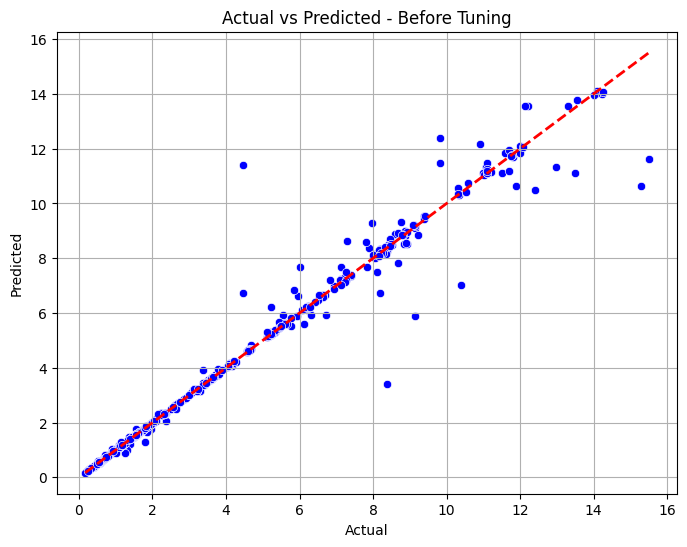

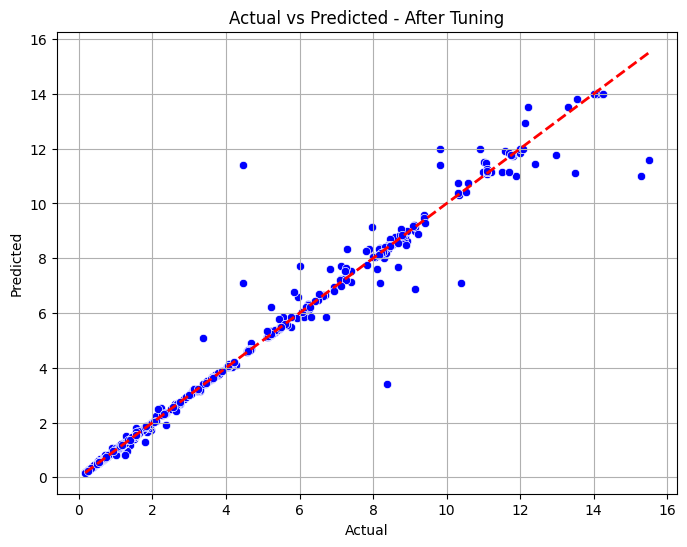


Manual Input Prediction
Enter values for the following input features in order:


e-void_ratio:  1
confining_pressure:  100
strain_rate:  0.1
cycles:  39



 Predicted shear_modulus: 4.6573


In [38]:
print("\n----RandomForest Model-----")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_training, y_training)
y_prediction = model.predict(X_testing)

def evaluate_model(y_true, y_prediction, label=''):
    print(f"\n Evaluation Metrics {label}") 
    r2 = r2_score(y_true, y_prediction)
    rmse = np.sqrt(mean_squared_error(y_true, y_prediction))
    mae = mean_absolute_error(y_true, y_prediction)
    mse = mean_squared_error(y_true, y_prediction) 
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    return r2, rmse, mae, mse

evaluate_model(y_testing, y_prediction, label="Before Hyperparameter Tuning")

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5, 
                           scoring='r2',
                           n_jobs=-1, 
                           verbose=1)

grid_search.fit(X_training, y_training)
best_model = grid_search.best_estimator_

print("\n Best Hyperparameters Found:\n", grid_search.best_params_)

y_pred_best = best_model.predict(X_testing)
evaluate_model(y_testing, y_pred_best, label="After Hyperparameter Tuning")

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_validation_scores = cross_val_score(best_model, X, y, cv=cv, scoring='r2')
print("\n Cross-validation R² Scores:", cross_validation_scores)
print("Mean CV R² Score:", np.mean(cross_validation_scores))

def plot_predictions(y_true, y_prediction, title=''):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_prediction, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {title}') 
    plt.grid(True)
    plt.show()

plot_predictions(y_testing, y_prediction, "Before Tuning") 
plot_predictions(y_testing, y_pred_best, "After Tuning")

print("\nManual Input Prediction")
print("Enter values for the following input features in order:")

input_features = list(X.columns) 
manual_input = []

for feature in input_features:
    val = float(input(f"{feature}: "))
    manual_input.append(val)

manual_input_df = pd.DataFrame([manual_input], columns=input_features) 

final_model = best_model

predicted_output = final_model.predict(manual_input_df) 
target_name = y.name
print(f"\n Predicted {target_name}: {predicted_output[0]:.4f}")


#### **Shap Analysis of Random Forest Model**

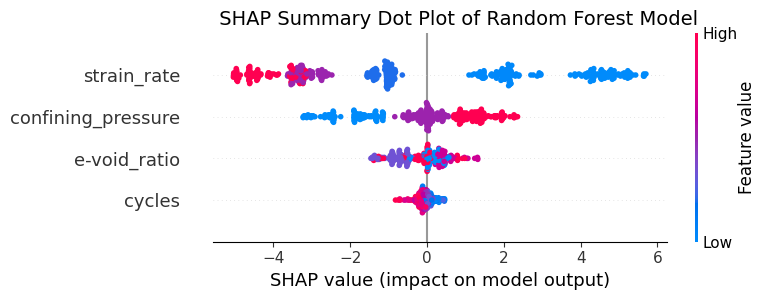

In [39]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.Explainer(final_model, X_training)
shap_values = explainer(X_testing)

# SHAP summary dot plot 
plt.figure()
#plt.title(r"$(\bf{(a)}$ SHAP Summary Dot Plot)", fontsize=14, loc='left')
plt.title(r" SHAP Summary Dot Plot of Random Forest Model", fontsize=14, loc='left')
shap.summary_plot(shap_values, X_testing, plot_type="dot", show=True)


## **XGB Regressor Model**


----XGB Regressor Model-----

 Evaluation Metrics Before Hyperparameter Tuning
R² Score: 0.9667
RMSE: 0.6673
MAE: 0.2373
MSE: 0.4453
Fitting 5 folds for each of 81 candidates, totalling 405 fits

 Best Hyperparameters Found:
 {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}

 Evaluation Metrics After Hyperparameter Tuning
R² Score: 0.9782
RMSE: 0.5393
MAE: 0.2197
MSE: 0.2909

 Cross-validation R² Scores: [0.97821941 0.98036666 0.98548005 0.98750146 0.98628928]
Mean CV R² Score: 0.9835713726400467


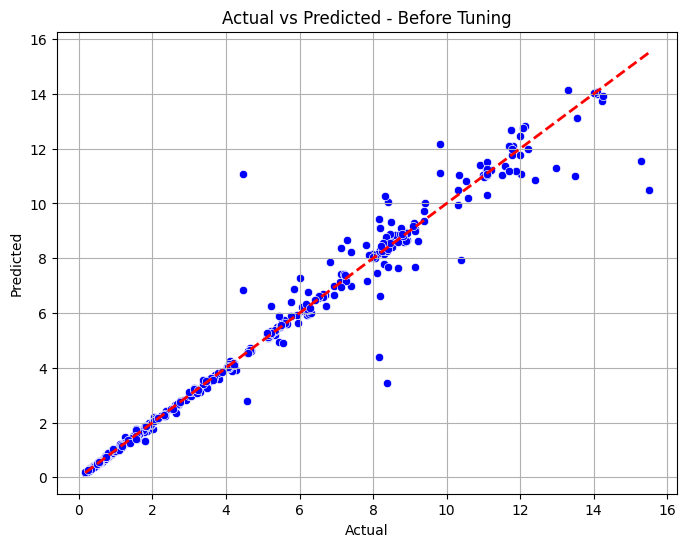

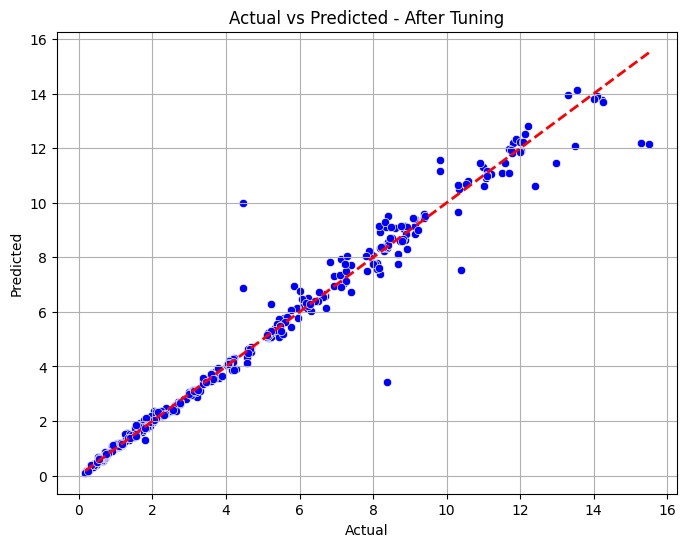


-----Manual Input Prediction------
Enter values for the following input features in order:


e-void_ratio:  1
confining_pressure:  100
strain_rate:  0.1
cycles:  39



 Predicted shear_modulus: 4.6390


In [40]:
print("\n----XGB Regressor Model-----")
model = XGBRegressor(random_state=42, verbosity=0)
model.fit(X_training, y_training) 
y_prediction = model.predict(X_testing)

def evaluate_model(y_true, y_prediction, label=''):
    print(f"\n Evaluation Metrics {label}") 
    r2 = r2_score(y_true, y_prediction)
    rmse = np.sqrt(mean_squared_error(y_true, y_prediction)) 
    mae = mean_absolute_error(y_true, y_prediction)
    mse = mean_squared_error(y_true, y_prediction)
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    return r2, rmse, mae, mse

evaluate_model(y_testing, y_prediction, label="Before Hyperparameter Tuning") 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42, verbosity=0),
                           param_grid,
                           cv=5,
                           scoring='r2', 
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_training, y_training) 
best_model = grid_search.best_estimator_

print("\n Best Hyperparameters Found:\n", grid_search.best_params_) 

y_pred_best = best_model.predict(X_testing)
evaluate_model(y_testing, y_pred_best, label="After Hyperparameter Tuning")

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_validation_scores = cross_val_score(best_model, X, y, cv=cv, scoring='r2')
print("\n Cross-validation R² Scores:", cross_validation_scores)
print("Mean CV R² Score:", np.mean(cross_validation_scores))

# Plotting predictions
def plot_predictions(y_true, y_pred, title=''): 
    plt.figure(figsize=(8, 6)) 
    sns.scatterplot(x=y_true, y=y_pred, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2) 
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {title}') 
    plt.grid(True)
    plt.show()

plot_predictions(y_testing, y_prediction, "Before Tuning") 
plot_predictions(y_testing, y_pred_best, "After Tuning")

print("\n-----Manual Input Prediction------")
print("Enter values for the following input features in order:")

input_features = list(X.columns)
manual_input = []

for feature in input_features:
    val = float(input(f"{feature}: "))
    manual_input.append(val)

manual_input_df = pd.DataFrame([manual_input], columns=input_features) 
final_model = best_model

predicted_output = final_model.predict(manual_input_df)

target_name = y.name
print(f"\n Predicted {target_name}: {predicted_output[0]:.4f}")


#### **Shap Analysis of XGB Regrssor Model**

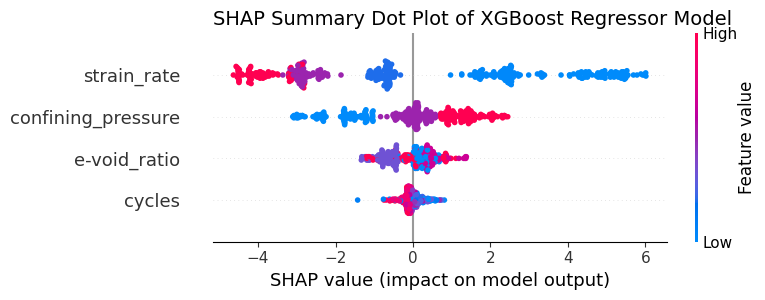

In [41]:
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

# === STEP 1: Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === STEP 2: Train XGBoost Regressor ===
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# === STEP 3: SHAP TreeExplainer ===
explainer = shap.Explainer(model)  # Automatically uses TreeExplainer for XGB
shap_values = explainer(X_test)

# === STEP 4: SHAP Summary Dot Plot ===
plt.figure()
plt.title("SHAP Summary Dot Plot of XGBoost Regressor Model", fontsize=14, loc='left')
shap.summary_plot(shap_values, X_test, plot_type="dot", show=True)


## **SVR Model**


----SVR Model-----

 Evaluation Metrics Before Hyperparameter Tuning
R² Score: 0.9118
RMSE: 1.0854
MAE: 0.6482
MSE: 1.1780
Fitting 5 folds for each of 54 candidates, totalling 270 fits

 Best Hyperparameters Found:
 {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

 Evaluation Metrics After Hyperparameter Tuning
R² Score: 0.9148
RMSE: 1.0669
MAE: 0.6483
MSE: 1.1383

 Cross-validation R² Scores: [0.39488783 0.35540752 0.37301689 0.38346236 0.35585954]
Mean CV R² Score: 0.3725268268060802


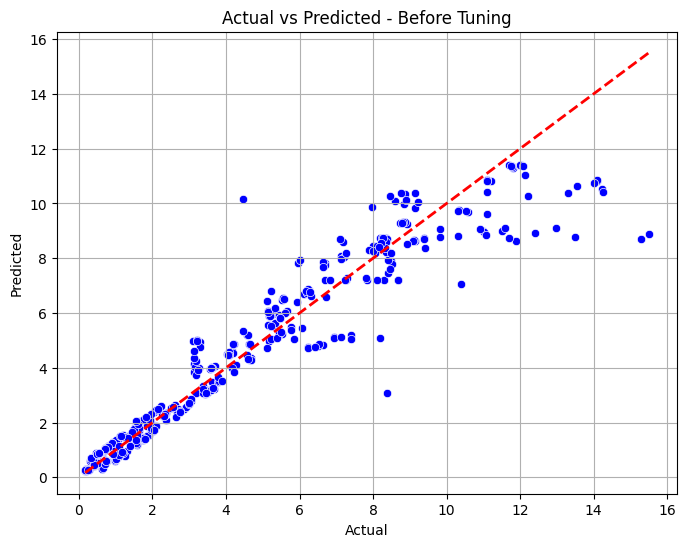

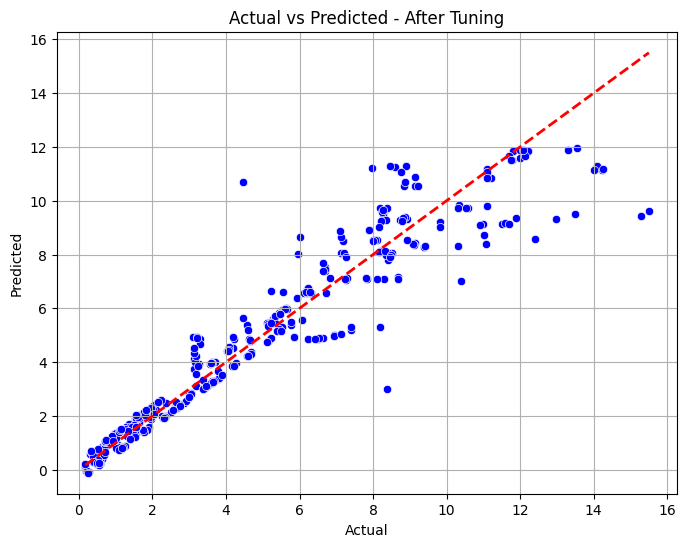


Manual Input Prediction
Enter values for the following input features in order:


e-void_ratio:  1
confining_pressure:  100
strain_rate:  0.1
cycles:  39



 Predicted shear_modulus: 8.4373


In [42]:
print("\n----SVR Model-----")
# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features and target
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # SVR needs 1D array

# Train/test split on scaled data
X_training, X_testing, y_training, y_testing = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

model = SVR()
model.fit(X_training, y_training)
y_prediction_scaled = model.predict(X_testing)

y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()
y_testing_original = scaler_y.inverse_transform(y_testing.reshape(-1, 1)).ravel()

def evaluate_model(y_true, y_pred, label=''):
     print(f"\n Evaluation Metrics {label}")
     r2 = r2_score(y_true, y_pred)
     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
     mae = mean_absolute_error(y_true, y_pred)
     mse = mean_squared_error(y_true, y_pred)
     print(f"R² Score: {r2:.4f}")
     print(f"RMSE: {rmse:.4f}")
     print(f"MAE: {mae:.4f}")
     print(f"MSE: {mse:.4f}")
     return r2, rmse, mae, mse
    
evaluate_model(y_testing_original, y_prediction, label="Before Hyperparameter Tuning")
param_grid = {
 'C': [0.1, 1, 10],
 'epsilon': [0.01, 0.1, 0.5],
 'kernel': ['linear', 'rbf', 'poly'],
 'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVR(),
     param_grid,
     cv=5,
     scoring='r2',
     n_jobs=-1,
     verbose=1)

grid_search.fit(X_training, y_training)
best_model = grid_search.best_estimator_

print("\n Best Hyperparameters Found:\n", grid_search.best_params_)

y_pred_best_scaled = best_model.predict(X_testing)
y_pred_best = scaler_y.inverse_transform(y_pred_best_scaled.reshape(-1, 1)).ravel()

evaluate_model(y_testing_original, y_pred_best, label="After Hyperparameter Tuning")

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_validation_scores = cross_val_score(best_model, X, y, cv=cv, scoring='r2')
print("\n Cross-validation R² Scores:", cross_validation_scores)
print("Mean CV R² Score:", np.mean(cross_validation_scores))

def plot_predictions(y_true, y_pred, title=''):
     plt.figure(figsize=(8, 6))
     sns.scatterplot(x=y_true, y=y_pred, color='blue')
     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
     plt.xlabel('Actual')
     plt.ylabel('Predicted')
     plt.title(f'Actual vs Predicted - {title}')
     plt.grid(True)
     plt.show()
    
plot_predictions(y_testing_original, y_prediction, "Before Tuning")
plot_predictions(y_testing_original, y_pred_best, "After Tuning")

print("\nManual Input Prediction")
print("Enter values for the following input features in order:")

input_features = list(X.columns)
manual_input = []

for feature in input_features:
 val = float(input(f"{feature}: "))
 manual_input.append(val)
    
manual_input_df = pd.DataFrame([manual_input], columns=input_features)
manual_input_scaled = scaler_X.transform(manual_input_df)

predicted_scaled = best_model.predict(manual_input_scaled)
predicted_output = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1)).ravel()

#print(f"\n Predicted Output: {predicted_output[0]:.4f}") 
target_name = y.name
print(f"\n Predicted {target_name}: {predicted_output[0]:.4f}")


## **KNN Model**


----KNN Model-----

Evaluation Metrics Before Hyperparameter Tuning
R² Score: 0.8949
RMSE: 1.1845
MAE: 0.6226
MSE: 1.4030
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Hyperparameters Found:
 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}

Evaluation Metrics After Hyperparameter Tuning
R² Score: 0.8949
RMSE: 1.1845
MAE: 0.6228
MSE: 1.4029

 Cross-validation R² Scores: [0.79384793 0.76242127 0.78843037 0.80354654 0.77431748]
Mean CV R² Score: 0.7845127177498659


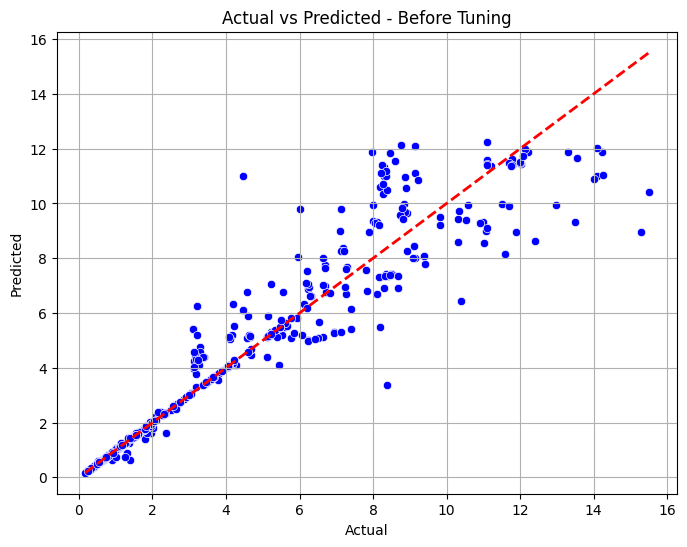

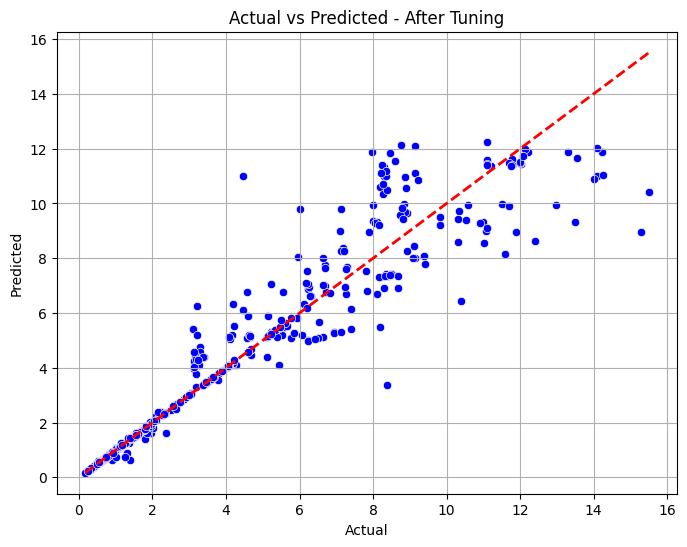


Manual Input Prediction
Enter values for the following input features in order:


e-void_ratio:  1
confining_pressure:  100
strain_rate:  0.1
cycles:  39



 Predicted shear_modulus: 4.9002


In [43]:
print("\n----KNN Model-----")
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

X_training, X_testing, y_training, y_testing = train_test_split(X_scaled, y_scaled, test_size=0.2,random_state=42)

model = KNeighborsRegressor()
model.fit(X_training, y_training)

y_prediction_scaled = model.predict(X_testing)
y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()
y_testing_original = scaler_y.inverse_transform(y_testing.reshape(-1, 1)).ravel()

def evaluate_model(y_true, y_pred, label=''):
     print(f"\nEvaluation Metrics {label}")
     r2 = r2_score(y_true, y_pred)
     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
     mae = mean_absolute_error(y_true, y_pred)
     mse = mean_squared_error(y_true, y_pred)
     print(f"R² Score: {r2:.4f}")
     print(f"RMSE: {rmse:.4f}")
     print(f"MAE: {mae:.4f}")
     print(f"MSE: {mse:.4f}")
     return r2, rmse, mae, mse
    
evaluate_model(y_testing_original, y_prediction, label="Before Hyperparameter Tuning")
param_grid = {
     'n_neighbors': [3, 5, 7, 9, 11],
     'weights': ['uniform', 'distance'],
     'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

grid_search = GridSearchCV(KNeighborsRegressor(),
     param_grid,
     cv=5,
     scoring='r2',
     n_jobs=-1,
     verbose=1)

grid_search.fit(X_training, y_training)
best_model = grid_search.best_estimator_

print("\nBest Hyperparameters Found:\n", grid_search.best_params_)

y_pred_best_scaled = best_model.predict(X_testing)
y_pred_best = scaler_y.inverse_transform(y_pred_best_scaled.reshape(-1, 1)).ravel()
evaluate_model(y_testing_original, y_pred_best, label="After Hyperparameter Tuning")

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_validation_scores = cross_val_score(best_model, X, y, cv=cv, scoring='r2')
print("\n Cross-validation R² Scores:", cross_validation_scores)
print("Mean CV R² Score:", np.mean(cross_validation_scores))

def plot_predictions(y_true, y_pred, title=''):
     plt.figure(figsize=(8, 6))
     sns.scatterplot(x=y_true, y=y_pred, color='blue')
     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
     plt.xlabel('Actual')
     plt.ylabel('Predicted')
     plt.title(f'Actual vs Predicted - {title}')
     plt.grid(True)
     plt.show()
    
plot_predictions(y_testing_original, y_prediction, "Before Tuning")
plot_predictions(y_testing_original, y_pred_best, "After Tuning")

print("\nManual Input Prediction")
print("Enter values for the following input features in order:")

input_features = list(X.columns)
manual_input = []

for feature in input_features:
 val = float(input(f"{feature}: "))
 manual_input.append(val)

manual_input_df = pd.DataFrame([manual_input], columns=input_features)
manual_input_scaled = scaler_X.transform(manual_input_df)

predicted_scaled = best_model.predict(manual_input_scaled)
predicted_output = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1)).ravel()

#print(f"\nPredicted Output: {predicted_output[0]:.4f}") 
target_name = y.name
print(f"\n Predicted {target_name}: {predicted_output[0]:.4f}")


## **Linear Regression Model**


----Linear Regression Model-----

Evaluation Metrics Linear Regression
R² Score: 0.7063
RMSE: 1.9803
MAE: 1.6557
MSE: 3.9214

Best Hyperparameters Found (Ridge): {'alpha': 1}

Evaluation Metrics Ridge Regression
R² Score: 0.7064
RMSE: 1.9802
MAE: 1.6555
MSE: 3.9210

Best Hyperparameters Found (Lasso): {'alpha': 0.01}

Evaluation Metrics Lasso Regression
R² Score: 0.7061
RMSE: 1.9812
MAE: 1.6532
MSE: 3.9253

 Cross-validation R² Scores: [0.79384793 0.76242127 0.78843037 0.80354654 0.77431748]
Mean CV R² Score: 0.7845127177498659


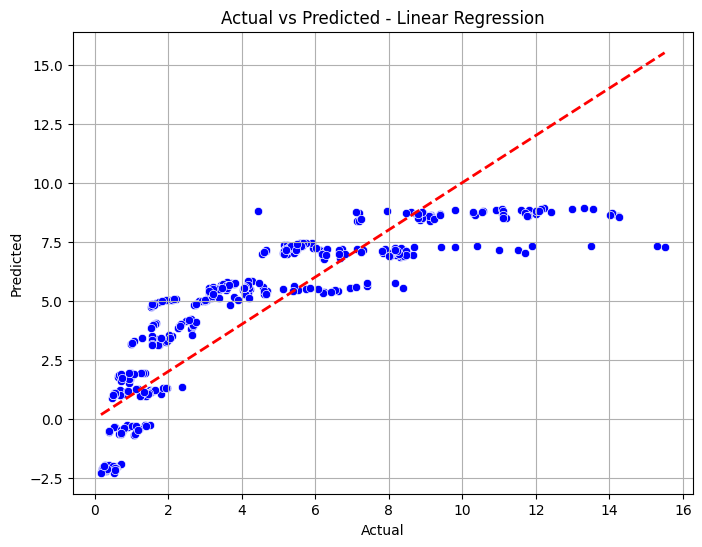

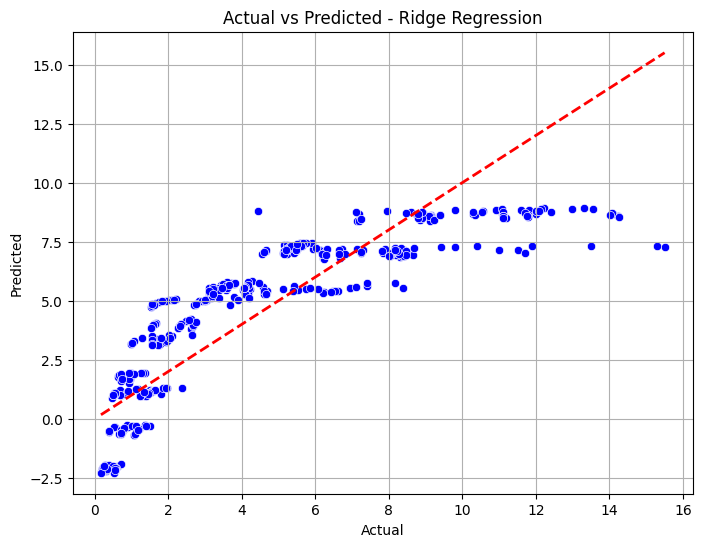

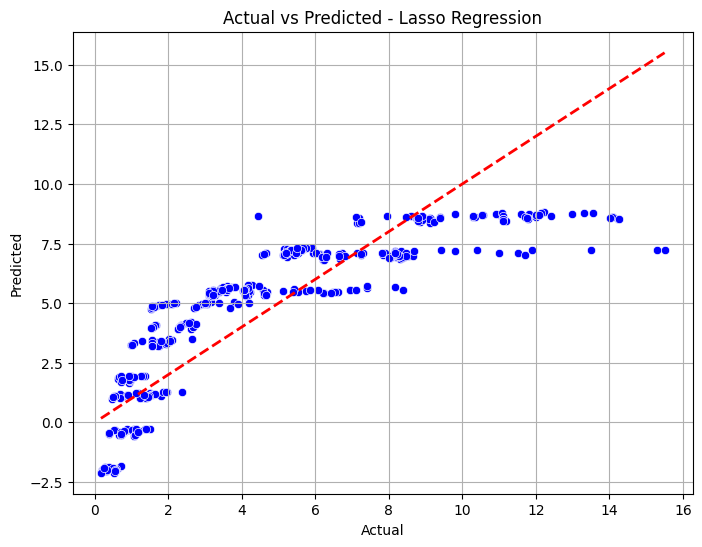


Manual Input Prediction
Enter values for the following input features in order:


e-void_ratio:  1
confining_pressure:  100
strain_rate:  0.1
cycles:  39



 Predicted shear_modulus: 5.1760


In [44]:
print("\n----Linear Regression Model-----")

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_scaled = model.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

def evaluate_model(y_true, y_pred, label=''):
     print(f"\nEvaluation Metrics {label}")
     r2 = r2_score(y_true, y_pred)
     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
     mae = mean_absolute_error(y_true, y_pred)
     mse = mean_squared_error(y_true, y_pred)
     print(f"R² Score: {r2:.4f}")
     print(f"RMSE: {rmse:.4f}")
     print(f"MAE: {mae:.4f}")
     print(f"MSE: {mse:.4f}")
     return r2, rmse, mae, mse
    
evaluate_model(y_test_original, y_pred, label="Linear Regression")

param_grid = {
 'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

ridge_best = ridge_grid.best_estimator_
y_ridge_pred = ridge_best.predict(X_test)
y_ridge_pred = scaler_y.inverse_transform(y_ridge_pred.reshape(-1, 1)).ravel()

print("\nBest Hyperparameters Found (Ridge):", ridge_grid.best_params_)

evaluate_model(y_test_original, y_ridge_pred, label="Ridge Regression")

lasso_grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

lasso_best = lasso_grid.best_estimator_

y_lasso_pred = lasso_best.predict(X_test)
y_lasso_pred = scaler_y.inverse_transform(y_lasso_pred.reshape(-1, 1)).ravel()

print("\nBest Hyperparameters Found (Lasso):", lasso_grid.best_params_)

evaluate_model(y_test_original, y_lasso_pred, label="Lasso Regression")

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_validation_scores = cross_val_score(best_model, X, y, cv=cv, scoring='r2')
print("\n Cross-validation R² Scores:", cross_validation_scores)
print("Mean CV R² Score:", np.mean(cross_validation_scores))

def plot_predictions(y_true, y_pred, title=''):
     plt.figure(figsize=(8, 6))
     sns.scatterplot(x=y_true, y=y_pred, color='blue')
     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
     plt.xlabel('Actual')
     plt.ylabel('Predicted')
     plt.title(f'Actual vs Predicted - {title}')
     plt.grid(True)
     plt.show()
    
plot_predictions(y_test_original, y_pred, "Linear Regression")
plot_predictions(y_test_original, y_ridge_pred, "Ridge Regression")
plot_predictions(y_test_original, y_lasso_pred, "Lasso Regression")

print("\nManual Input Prediction")
print("Enter values for the following input features in order:")

input_features = list(X.columns)
manual_input = []

for feature in input_features:
 val = float(input(f"{feature}: "))
 manual_input.append(val)

manual_input_df = pd.DataFrame([manual_input], columns=input_features)
manual_input_scaled = scaler_X.transform(manual_input_df)

predicted_scaled = ridge_best.predict(manual_input_scaled)
predicted_output = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1)).ravel()

#print(f"\nPredicted Output (Ridge): {predicted_output[0]:.4f}") 
target_name = y.name
print(f"\n Predicted {target_name}: {predicted_output[0]:.4f}")


#### **Shap Analysis of Linear Regression Model**

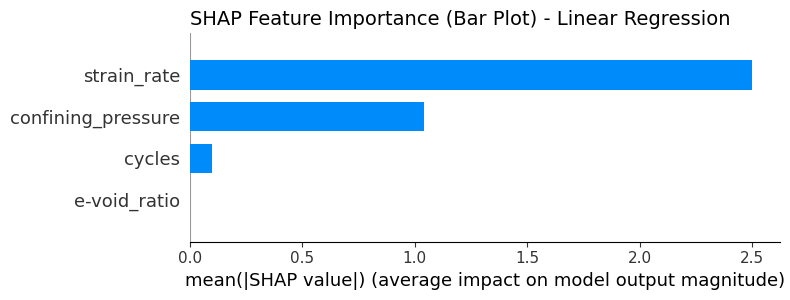

In [46]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

masker = shap.maskers.Independent(X_train)
explainer = shap.LinearExplainer(model, masker)
shap_values = explainer(X_test)

plt.figure()
plt.title("SHAP Feature Importance (Bar Plot) - Linear Regression", fontsize=14, loc='left')
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
